# Import Librares

In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Importing Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Preprocessing

In [3]:
train_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


# Validation Image Preprocessing

In [4]:
valid_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)
train_set = train_set.map(lambda x, y: (x / 255.0, y))
valid_set = valid_set.map(lambda x, y: (x / 255.0, y))

Found 17572 files belonging to 38 classes.


# Building Model

In [5]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.models import Sequential

In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(filters = 32,kernel_size = 3,padding = 'same',activation = 'relu',input_shape = [128,128,3]))
model.add(Conv2D(filters = 32,kernel_size = 3,activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))

C:\Users\VARSHITH\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.add(Conv2D(filters = 64,kernel_size = 3,padding = 'same',activation = 'relu',input_shape=[128,128,3]))
model.add(Conv2D(filters = 64,kernel_size = 3,activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))


In [9]:
model.add(Conv2D(filters = 128,kernel_size = 3,padding = 'same',activation = 'relu',input_shape=[128,128,3]))
model.add(Conv2D(filters = 128,kernel_size = 3,activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))

In [10]:
model.add(Conv2D(filters = 256,kernel_size = 3,padding = 'same',activation = 'relu',input_shape=[128,128,3]))
model.add(Conv2D(filters = 256,kernel_size = 3,activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))

In [11]:
model.add(Conv2D(filters = 512,kernel_size = 3,padding = 'same',activation = 'relu',input_shape=[128,128,3]))
model.add(Conv2D(filters = 512,kernel_size = 3,activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))

In [12]:
model.add(Dropout(0.25))

In [13]:
from tensorflow.keras.layers import Flatten


In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=2000,activation='relu'))

In [16]:
model.add(Dropout(0.25))

In [17]:
model.add(Dense(units=38,activation='softmax'))

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2000)           │     4,098,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        76,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,886,262 (33.90 MB)

 Trainable params: 8,886,262 (33.90 MB)

 Non-trainable params: 0 (0.00 B)

# Training Model

In [20]:
training_hist = model.fit(x=train_set,validation_data=valid_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1543s 700ms/step - accuracy: 0.2561 - loss: 2.6317 - val_accuracy: 0.7455 - val_loss: 0.8176
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1582s 720ms/step - accuracy: 0.7385 - loss: 0.8217 - val_accuracy: 0.8517 - val_loss: 0.4650
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1552s 706ms/step - accuracy: 0.8360 - loss: 0.5041 - val_accuracy: 0.8742 - val_loss: 0.3896
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1566s 713ms/step - accuracy: 0.8807 - loss: 0.3615 - val_accuracy: 0.9038 - val_loss: 0.3000
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1553s 707ms/step - accuracy: 0.9078 - loss: 0.2758 - val_accuracy: 0.9200 - val_loss: 0.2460
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1554s 707ms/step - accuracy: 0.9299 - loss: 0.2090 - val_accuracy: 0.9192 - val_loss: 0.2465
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1587s 722ms/step - accuracy: 0.9427 - loss: 0.1656 - val_accuracy: 0.9397 - val_loss: 0.1894
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1673s 761ms/s

# Model Evaluation

In [21]:
train_loss,train_acc = model.evaluate(train_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 324s 148ms/step - accuracy: 0.9844 - loss: 0.0460


In [22]:
print(train_loss,train_acc)

0.04143565520644188 0.9862294793128967


In [23]:
train_loss,train_acc = model.evaluate(valid_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 78s 141ms/step - accuracy: 0.9497 - loss: 0.1654


In [24]:
train_loss,train_acc = model.evaluate(train_set)
valid_loss,valid_acc = model.evaluate(valid_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 322s 146ms/step - accuracy: 0.9843 - loss: 0.0460
550/550 ━━━━━━━━━━━━━━━━━━━━ 82s 148ms/step - accuracy: 0.9504 - loss: 0.1639


# Model Saving

In [25]:
model.save("Pre_final.h5")

In [26]:
training_hist.history

{'accuracy': [0.4446546733379364,
  0.7713350653648376,
  0.8508002161979675,
  0.8913294076919556,
  0.91593998670578,
  0.9346752762794495,
  0.9465965032577515,
  0.9547194242477417,
  0.9617469310760498,
  0.9693577289581299],
 'loss': [1.886121392250061,
  0.7129881978034973,
  0.4597271680831909,
  0.3319967985153198,
  0.2512260973453522,
  0.19620582461357117,
  0.15700146555900574,
  0.1310265064239502,
  0.11174751818180084,
  0.09083293378353119],
 'val_accuracy': [0.7455042004585266,
  0.8516958951950073,
  0.8741748332977295,
  0.9037673473358154,
  0.9200432300567627,
  0.9191896319389343,
  0.9397336840629578,
  0.941611647605896,
  0.9284088611602783,
  0.9504894018173218],
 'val_loss': [0.8175727725028992,
  0.4649931490421295,
  0.3895689845085144,
  0.30004987120628357,
  0.24596139788627625,
  0.24650980532169342,
  0.18940496444702148,
  0.18246668577194214,
  0.2181745171546936,
  0.16325019299983978]}

# Recoding history

In [27]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_hist.history,f)

# Accuracy Visualisation

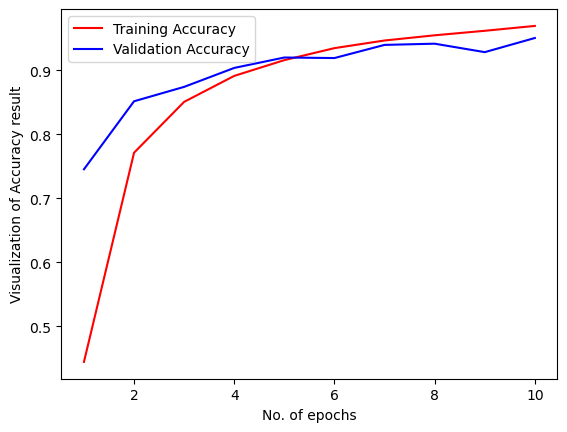

In [30]:
epochs = list(range(1, 11))  # Define epochs as a list

plt.plot(epochs, training_hist.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_hist.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("No. of epochs")
plt.ylabel("Visualization of Accuracy result")
plt.legend()
plt.show()


# Some other metrics for model evaluation

In [47]:
pip install tensorflow-datasets


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
   - -------------------------------------- 0.2/5.1 MB 1.4 MB/s eta 0:00:04
   - -------------------------------------- 0.2/5.1 MB 1.4 MB/s eta 0:00:04
   -- ------------------------------------- 0.3/5.1 MB 1.5 MB/s eta 0:00:04
   --- ------------------------------------ 0.5/5.1 MB 2.0 MB/s eta 0:00:03
   ----- ---------------------------------- 0.7/5.1 MB 2.3 MB/s eta 0:00:02
   ------- -------------------------------- 1.0/5.1 MB 2.7 MB/s eta 0:00:02
   -------- ------------------------------- 1.0/5.1 MB 2.6 MB/s eta 0:00:02
   ---------- ----------------------------- 1.3/5.1 MB 3.0 MB/s eta 0:00:02
   ---------- ----------------------------- 1.3/5.1 MB 3.0 MB/s eta 0:00:02
   ---

In [60]:
class_names = []
print(class_names)


AttributeError: '_MapDataset' object has no attribute 'class_names'

In [38]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [39]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 77s 138ms/step


(array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]], dtype=float32),
 (17572, 38))

In [40]:
predicted_cat = tf.argmax(y_pred,axis=1)
predicted_cat

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 1,  1,  1, ..., 36, 22, 37], dtype=int64)>

In [41]:
true_cat = tf.concat([y for x,y in test_set],axis=0)
true_cat

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [43]:
y_true = tf.argmax(true_cat,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [53]:
pip install sklearn-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn-learn (from versions: none)
ERROR: No matching distribution found for sklearn-learn
